NAME: RACHAEL NYAWIRA 


CLASS: PART-TIME

#### BUSINESS UNDERSTANDING


In a world that is quickly evolving towards adapting the use of technology, businesses have followed suit in bringing their stores and marketing on the internet.


In this project I look at sales of various products in different regions.


Questions that involve the Online Sales


1. What are the peak sales periods?

2. What is the correlation between units sold and he unit price

3. Are the seasons in different regions a factor that affects the product's revenue


In [61]:
#import relevant libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Data Understanding

In [62]:
data= pd.read_csv("Online Sales Data.csv")
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [63]:
data.shape

(240, 9)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [66]:
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce')
data['Date'].dtype

dtype('<M8[ns]')

In [114]:
data['Unit Price'] = data['Unit Price'].apply(lambda x: int(x))
data['Total Revenue'] = data['Total Revenue'].apply(lambda x: int(x))

In [116]:
data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                   int64
Total Revenue                int64
Region                      object
Payment Method              object
day                          int64
month                        int64
dtype: object

### Data Cleaning

In [117]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,day,month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999,1999,North America,Credit Card,1,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499,499,Europe,PayPal,2,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69,209,Asia,Debit Card,3,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15,63,North America,Credit Card,4,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89,89,Europe,PayPal,5,1


In [118]:
# To get to know where the missing values are
data.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
day                 0
month               0
dtype: int64

In [119]:
# number of duplicates
data.duplicated().sum()

0

Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

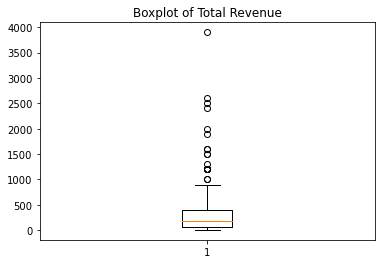

In [120]:
# checking for outliers
plt.boxplot(data['Total Revenue'].dropna())
plt.title('Boxplot of Total Revenue')
plt.show

In [121]:
""""
What This Boxplot Tells Us
The data has several outliers (the dots above the whiskers).
The distribution is right-skewed, meaning there are a few extreme values pulling the data toward higher numbers.
The majority of values are concentrated within the IQR (inside the box).
There may be a large difference between normal values and outliers, which suggests the need for further investigation
"""

'"\nWhat This Boxplot Tells Us\nThe data has several outliers (the dots above the whiskers).\nThe distribution is right-skewed, meaning there are a few extreme values pulling the data toward higher numbers.\nThe majority of values are concentrated within the IQR (inside the box).\nThere may be a large difference between normal values and outliers, which suggests the need for further investigation\n'

In [122]:
column = 'Total Revenue'


In [123]:
#compute the Q1 and Q3
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
print(Q1)
print(Q3)



62.0
399.0


In [124]:

#compute the interquartile range(IQR)
IQR = Q3 - Q1
IQR



337.0

In [125]:
#define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Lower Bound: -443.5, Upper Bound: 904.5


In [151]:

# Identify outliers
outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 19


In [136]:
# Remove outliers
data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
# Display the shape before and after removing outliers
print(f"Original dataset size: {data.shape[0]}")
print(f"Cleaned dataset size: {data_cleaned.shape[0]}")


Original dataset size: 240
Cleaned dataset size: 221


In [137]:

# Save the cleaned dataset
data_cleaned.to_csv("cleaned_sales_data.csv", index=False)


In [138]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


### Exploratory Data Analysis (EDA)

In [140]:
data['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [141]:
data['Product Name'].nunique()

232

In [142]:
data['Units Sold'].unique()

array([ 2,  1,  3,  4,  5,  6, 10], dtype=int64)

In [143]:
data['Unit Price'].describe()

count     240.000000
mean      236.395583
std       429.446695
min         6.500000
25%        29.500000
50%        89.990000
75%       249.990000
max      3899.990000
Name: Unit Price, dtype: float64

In [144]:
maxprice=data['Unit Price'].mean() + data['Unit Price'].std() * 3 
maxprice

1524.7356680647656

In [145]:
data[ data['Unit Price']> maxprice]

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
35,10036,2024-02-05,Sports,Peloton Bike,1,1895.00,1895.00,Asia,Credit Card
72,10073,2024-03-13,Electronics,HP Spectre x360 Laptop,1,1599.99,1599.99,North America,Credit Card
102,10103,2024-04-12,Electronics,Canon EOS R5 Camera,1,3899.99,3899.99,North America,Credit Card
216,10217,2024-08-04,Electronics,Apple MacBook Pro 16-inch,1,2399.00,2399.00,North America,Credit Card


In [146]:
data['Total Revenue'].describe()

count     240.000000
mean      335.699375
std       485.804469
min         6.500000
25%        62.965000
50%       179.970000
75%       399.225000
max      3899.990000
Name: Total Revenue, dtype: float64

In [147]:
data['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [148]:
data['Payment Method'].value_counts()

Credit Card    120
PayPal          80
Debit Card      40
Name: Payment Method, dtype: int64

In [149]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [152]:
monthly_sales = data.groupby('month')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['Total Revenue'])
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

KeyError: 'month'

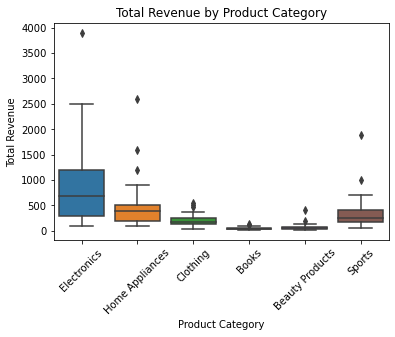

In [ ]:
sns.boxplot(x='Product Category', y='Total Revenue', data=data)
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.show()

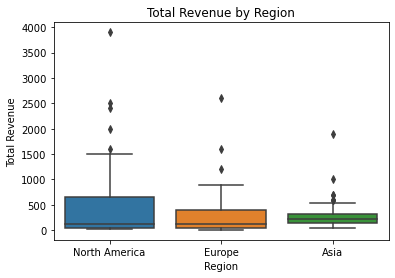

In [ ]:
sns.boxplot(x='Region', y='Total Revenue', data=data)
plt.title('Total Revenue by Region')
plt.show()

In [ ]:
data.groupby(['Product Category','Region'])['Total Revenue'].sum()

Product Category  Region       
Beauty Products   Europe            2621.90
Books             North America     1861.93
Clothing          Asia              8128.93
Electronics       North America    34982.41
Home Appliances   Europe           18646.16
Sports            Asia             14326.52
Name: Total Revenue, dtype: float64

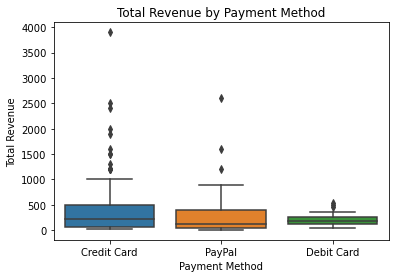

In [ ]:
sns.boxplot(x='Payment Method', y='Total Revenue', data=data)
plt.title('Total Revenue by Payment Method')
plt.show()